In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.dates as mpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
from pandas import DataFrame
from pandas import Series

sns.set(color_codes = True)
np.random.seed(sum(map(ord, 'distributions')))

myfont = mpl.font_manager.FontProperties(fname='./simsun.ttc') 

%config ZMQInteractiveShell.ast_node_interactivity = 'all'

## 问答题

### 1.随机从某超市抽取10个顾客，得到他们购物所花费的金额（单位：元）

- 数据：388，24，152，63.2，224.6，26，69，70，138，213

- 请问我们可以用哪些统计量，分析该组数据？

可以用
- 总数，最小值，最大值，分位数，中位数，均值，方差，标准差，偏度，峰度 等分析数据

In [2]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位数','25%分位数',
                    '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])

li = [388, 24, 152, 63.2, 224.6, 26, 69, 70, 138, 213]
d1 = pd.Series(li)
df = pd.DataFrame(status(d1))
df

df1 = pd.DataFrame(d1)
df1.describe()

,0
总数,10.000000
最小值,24.000000
最小值位数,1.000000
25%分位数,64.650000
中位数,104.000000
75%分位数,197.750000
均值,136.780000
最大值,388.000000
最大值位数,0.000000
平均绝对偏差,86.340000


,0
count,10.00000
mean,136.78000
std,113.68852
min,24.00000
25%,64.65000
50%,104.00000
75%,197.75000
max,388.00000


### 2.（接上题）试从可视化的角度分别解读这些统计量对分布的影响？

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


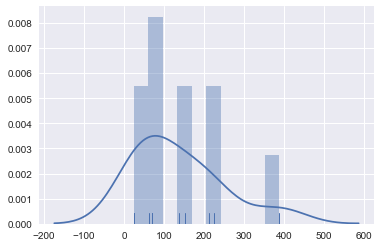

In [3]:
sns.distplot(d1, bins = 10, kde=True, rug=True)

- d1.count() #非空元素计算
- d1.min() #最小值
- d1.max() #最大值
- d1.quantile(0.1) #10%分位数
- d1.sum() #求和
- d1.mean() #均值，代表算术平均值
- d1.median() #中位数，若数据数量为奇数，中位数是中间那个，若是偶数，中位数是中间两个求平均值。中位数能揭示平均值掩盖的真相。
- d1.mode() #众数，密度函数最大的点，众数是一组数据中出现次数最多的那个数。
- d1.var() #方差，离平均的平方根距离的平均。
- d1.std() #标准差，差值分散的测量，方差的平方根。
- d1.describe() #一次性输出多个描述性统计指标

### 3.下表是2006年北京上海和天津，按收入法计算的地区生产总值（按当年价格计算）数据。

|地  区|劳动者报酬|生产税净额|固定资产折旧|营业盈余|
|:---|:---|:---|:---|:---|
|北京|3496.57|1161.55|1251.09|1961.07|
|天津|1383.36	|775.09|595.09|1605.61|			
|上海|13756.56|1623.36|1730.51|3255.94|	

- 请给出至少三种<b>适用</b>于描述上述数据所用的可视化图形？并简要说明这些方法的特点和用途。
 				


In [21]:
data = pd.DataFrame({
    'region':['BeiJing','TianJing','ShangHai'],
    'salary':[3496.57,1383.36,13756.56],
    'product_tax':[1161.55,775.09,1623.36],
    'asset_depreciation':[1251.09,595.09,1730.51],
    'operating_surplus':[1961.07,1605.61,3255.94]
},columns = ['region','salary','product_tax','asset_depreciation','operating_surplus'])

data

,region,salary,product_tax,asset_depreciation,operating_surplus
0,BeiJing,3496.57,1161.55,1251.09,1961.07
1,TianJing,1383.36,775.09,595.09,1605.61
2,ShangHai,13756.56,1623.36,1730.51,3255.94


### 柱状图
柱状图是用竖直的柱子来展现数据，一般用于展现横向的数据变化及对比。

图中展示了不同地区的劳动者报酬的对比情况

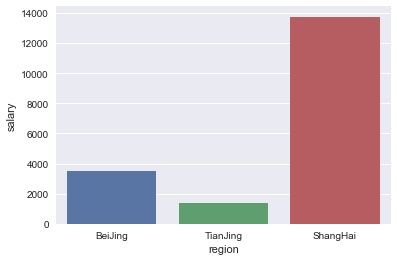

In [16]:
sns.barplot(x='region', y='salary',data=data)

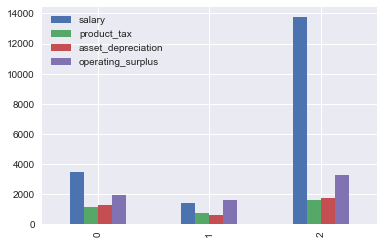

In [17]:
data.plot.bar()

### 饼图
饼图是利用圆形及圆内扇形面积来表示数值大小的图形。

饼图主要用于总体中各组成部分所占比重的研究。

图中提现了不同地图的劳动者报酬占总体的百分比

In [23]:
data.set_index(['region'],inplace=True)
data

,salary,product_tax,asset_depreciation,operating_surplus
region,,,,
BeiJing,3496.57,1161.55,1251.09,1961.07
TianJing,1383.36,775.09,595.09,1605.61
ShangHai,13756.56,1623.36,1730.51,3255.94


(<Figure size 1728x360 with 13 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ee04f28>,
       dtype=object))

([<matplotlib.patches.Wedge at 0x1a1f602240>,
 [Text(0.191589,1.08319,'salary'),
  Text(-1.09292,-0.124613,'product_tax'),
  Text(-0.52177,-0.968378,'asset_depreciation'),
  Text(0.779833,-0.775797,'operating_surplus')],
 [Text(0.104503,0.590829,'44.43%'),
  Text(-0.596138,-0.0679709,'14.76%'),
  Text(-0.284602,-0.528206,'15.90%'),
  Text(0.425364,-0.423162,'24.92%')])

([<matplotlib.patches.Wedge at 0x1a1f63cac8>,
 [Text(0.597132,0.923815,'salary'),
  Text(-0.914617,0.611127,'product_tax'),
  Text(-1.01384,-0.426765,'asset_depreciation'),
  Text(0.44215,-1.00723,'operating_surplus')],
 [Text(0.325708,0.503899,'31.73%'),
  Text(-0.498882,0.333342,'17.78%'),
  Text(-0.553004,-0.232781,'13.65%'),
  Text(0.241173,-0.549396,'36.83%')])

([<matplotlib.patches.Wedge at 0x1a1f67d400>,
 [Text(-0.576088,0.937082,'salary'),
  Text(-0.237875,-1.07397,'product_tax'),
  Text(0.324416,-1.05107,'asset_depreciation'),
  Text(0.964156,-0.529531,'operating_surplus')],
 [Text(-0.31423,0.511136,'67.55%'),
  Text(-0.12975,-0.585803,'7.97%'),
  Text(0.176954,-0.573313,'8.50%'),
  Text(0.525903,-0.288835,'15.99%')])

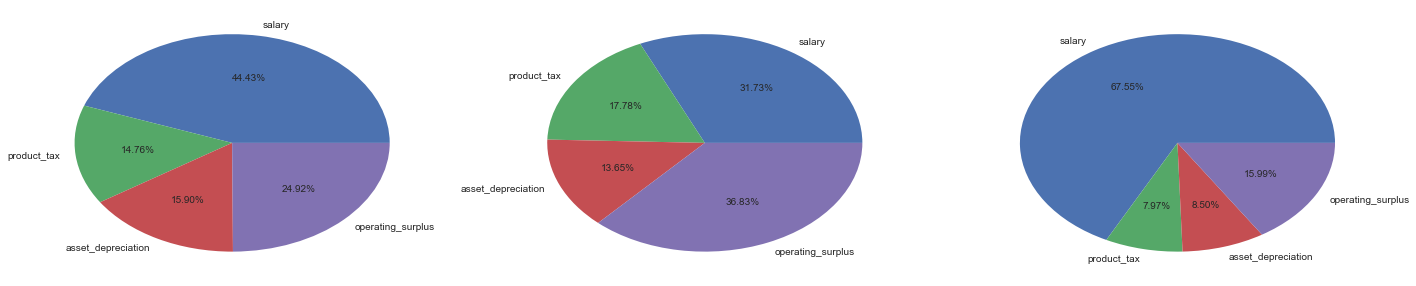

In [24]:
labels = data.columns
plt.subplots(13, figsize=(24,5))
plt.subplot(131)
plt.pie(data.iloc[0,:],labels=labels, autopct='%1.2f%%')
plt.subplot(132)
plt.pie(data.iloc[1,:],labels=labels, autopct='%1.2f%%')
plt.subplot(133)
plt.pie(data.iloc[2,:],labels=labels, autopct='%1.2f%%')

### 散点图
- 可以展示数据的分布和聚合情况
- 得到趋势线公式

**置信区间**
- 展现的是，这个总体参数的真实值有一定概率落在与该测量结果有关的某对应区间

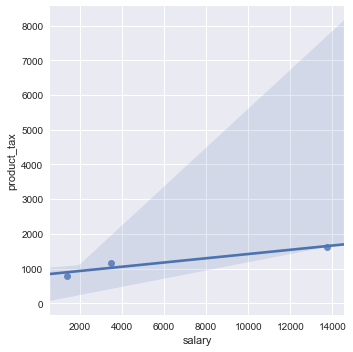

In [8]:
sns.lmplot(x='salary', y='product_tax', data=data)

### 堆积柱状图
可以看出一个地区的生产总值，以及各个组成成分的占比的相对大小

In [30]:
# 绘制堆积柱状图
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = sum(y_data_list[0:i]), align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

In [25]:
[data.iloc[:,x].values for x in range(len(data.columns))]

[array([ 3496.57,  1383.36, 13756.56]),
 array([1161.55,  775.09, 1623.36]),
 array([1251.09,  595.09, 1730.51]),
 array([1961.07, 1605.61, 3255.94])]

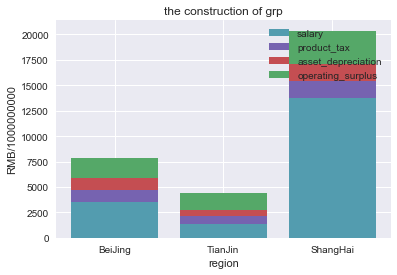

In [32]:
stackedbarplot(x_data = ['BeiJing', 'TianJin', 'ShangHai']
               , y_data_list = [data.iloc[:,0].values, data.iloc[:,1].values, data.iloc[:,2].values, data.iloc[:,3].values]#[data.iloc[:,x].values for x in range(len(grp_.columns))]
               , y_data_names = data.columns
               , colors = ['#539caf', '#7663b0', 'r', 'g']
               , x_label = 'region'
               , y_label = 'RMB/1000000000'
               , title = 'the construction of grp')

### 4.试述有哪些方法可以判断一组数据是否服从正态分布？
- 答：
   - 使用绘图观察法，seaborn的distplot函数，并参数kde、rug设置为True，观察曲线以及对应数据的集中度来判断
   - 使用工具包函数scipy.stats.normaltest、scipy.stats.anderson(x, dist=’norm’)、scipy.stats.shapiro(x, a=None, reta=False)、scipy.stats.kstest

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


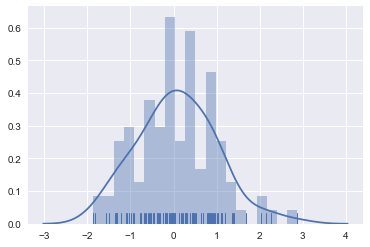

In [9]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True, bins=20, rug=True)

### 5.试述您对置信水平和置信区间的理解？
置信区间
- 总体参数的真实值有一定概率落在与该测量结果有关的某对应区间。

置信水平
- 在同一个总体中反复抽取样本时包括总体参数的区间所占的百分比。

## 实战题
### 1.航班乘客变化分析
- 载入相应绘图库及航班乘客数据（flights）
- 分析年度乘客总量变化情况（折线图）
- 分析乘客在一年中各月份的分布（柱状图）

- 载入相应绘图库及航班乘客数据（flights）

In [37]:
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图） 

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1de69b70>)

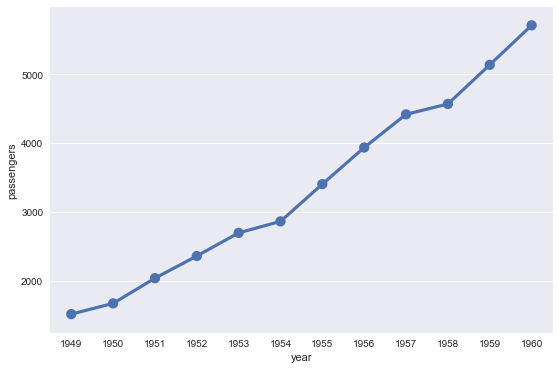

In [39]:
plt.subplots(figsize=(9,6))
data_by_year = data.groupby('year')['year','passengers'].sum()
sns.pointplot(x = data_by_year.index, y='passengers', data=data_by_year)

- 分析乘客在一年中各月份的分布（柱状图）

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f1aff98>)

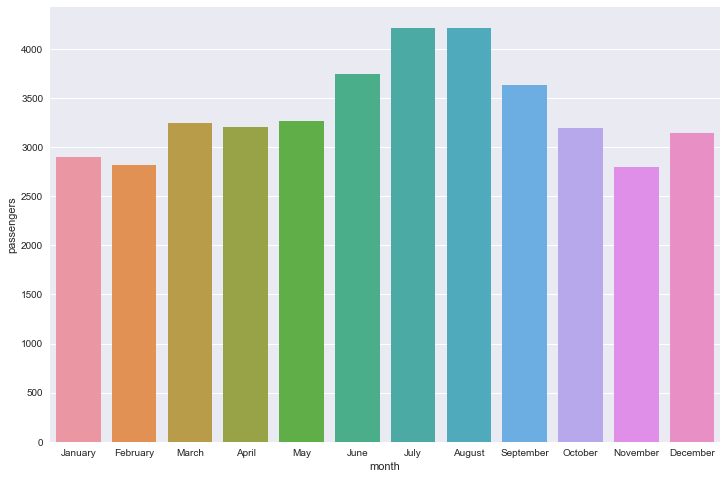

In [41]:
plt.subplots(figsize=(12,8))
data_by_month = data.groupby('month')['month','passengers'].sum()
sns.barplot(x=data_by_month.index, y='passengers', data=data_by_month)

### 2.鸢尾花花型尺寸分析

* 载入iris数据集
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

- 载入iris数据集

In [42]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 萼片（sepal）和花瓣（petal）的大小关系（散点图）

In [43]:
data.loc[:,'sepal_area'] = data['sepal_length'] * data['sepal_width']
data.loc[:,'petal_area'] = data['petal_length'] * data['petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


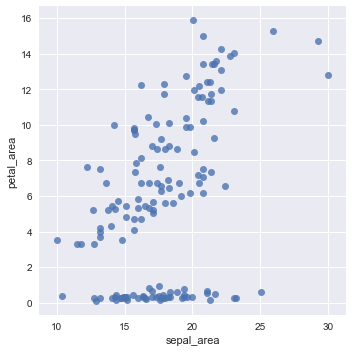

In [44]:
sns.lmplot(x='sepal_area', y='petal_area', data=data, scatter=True, fit_reg=False)

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


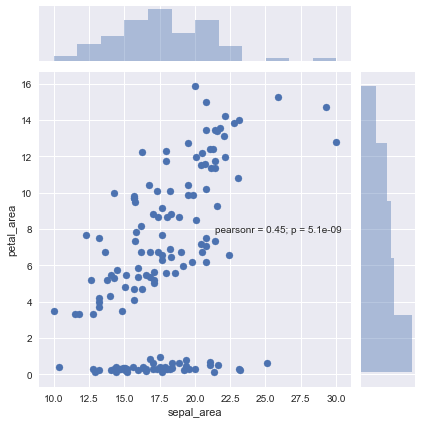

In [45]:
sns.jointplot(x='sepal_area', y='petal_area', data=data, kind='scatter')

- 不同种类鸢尾花萼片和花瓣大小的分布情况（箱式图）

- setosa鸢尾花萼片分布在15-20之间，
- versicolor鸢尾花萼片分布在15-20之间，
- virginica鸢尾花萼片分布在17.5-22.5之间。

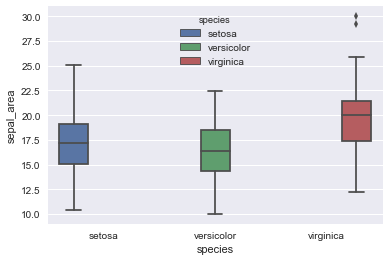

In [48]:
sns.boxplot(x='species', y='sepal_area', data=data, hue='species')

- setosa鸢尾花瓣分布在0-2之间，
- versicolor鸢尾花萼片分布在4-7之间，
- virginica鸢尾花萼片分布在9-13之间。

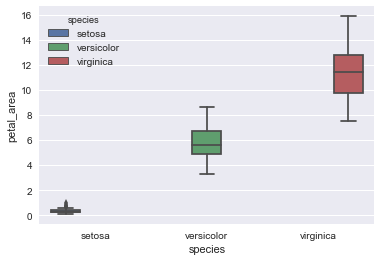

In [49]:
sns.boxplot(x='species', y='petal_area', data=data, hue='species')

- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图）

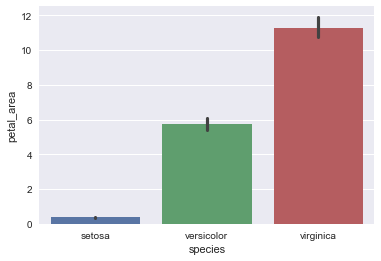

In [54]:
sns.barplot(x='species', y='petal_area', data=data)

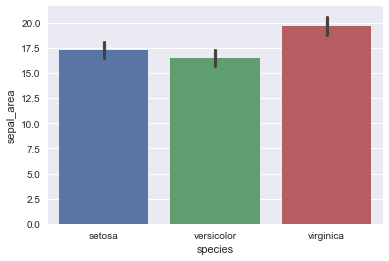

In [55]:
sns.barplot(x='species', y='sepal_area', data=data)

不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

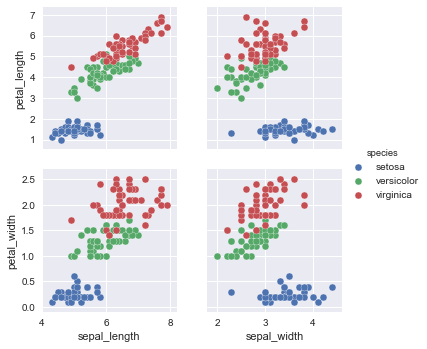

In [56]:
sns.pairplot(data, x_vars=['sepal_length','sepal_width'],y_vars=['petal_length','petal_width'], hue='species')

In [57]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


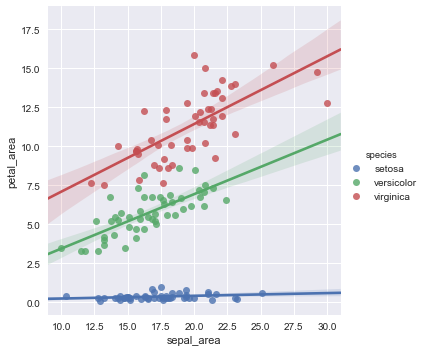

In [58]:
sns.lmplot(x='sepal_area', y='petal_area', hue='species', data=data)

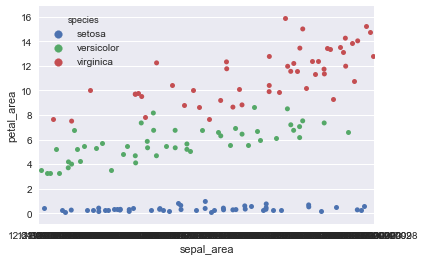

In [60]:
sns.stripplot(x='sepal_area', y='petal_area', hue='species', data=data, jitter = True)

### 3.餐厅小费情况分析
* 载入tips数据集
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

- 载入tips数据集

In [62]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 小费和总消费之间的关系（散点图）

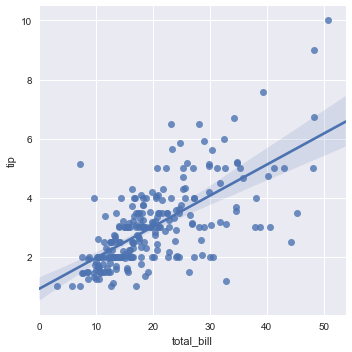

In [63]:
sns.lmplot(x='total_bill', y='tip', data=data, fit_reg=True)

- 男性顾客和女性顾客，谁更慷慨（分类箱式图）

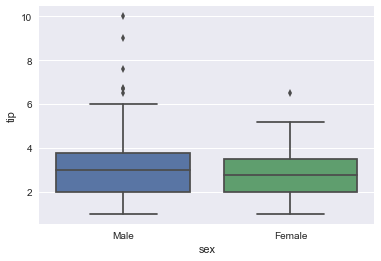

In [64]:
sns.boxplot(x='sex', y='tip', data=data)

- 抽烟与否是否会对小费金额产生影响（分类箱式图）

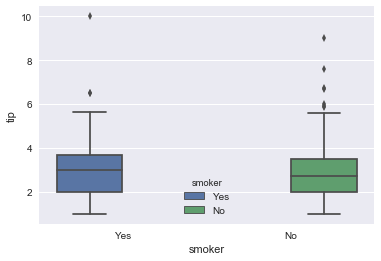

In [67]:
sns.boxplot(x='smoker', y='tip', data=data, hue='smoker')

- 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

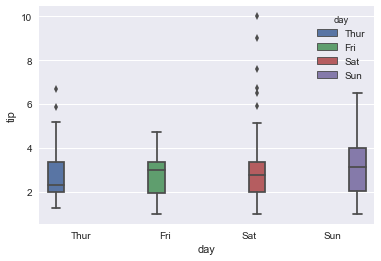

In [68]:
sns.boxplot(x='day', y='tip', data=data, hue='day')

- 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

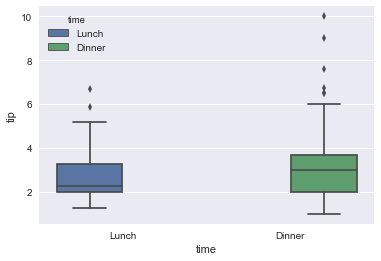

In [69]:
sns.boxplot(x='time', y='tip', data=data, hue='time')

- 就餐人数是否会对慷慨度产生影响（分类箱式图）

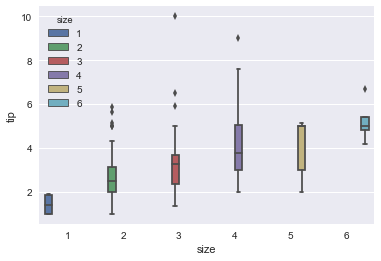

In [70]:
sns.boxplot(x='size', y='tip', data=data, hue='size')

- 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

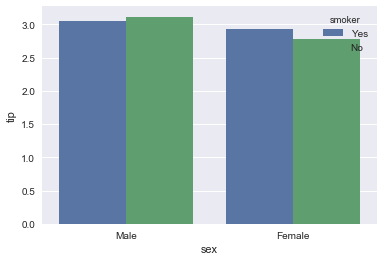

In [75]:
sns.barplot(x = 'sex', y = 'tip', hue = 'smoker', data = data, ci=None)

### 4.泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [76]:
data = sns.load_dataset('titanic')
data['total'] = 1
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,total
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


- 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

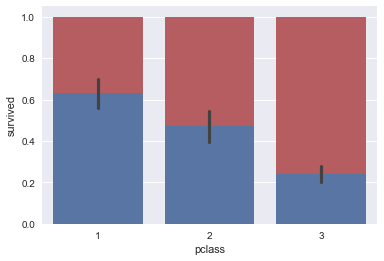

In [77]:
data['total'] = 1
fig,ax = plt.subplots()
sns.barplot(x='pclass', y='total', data=data, color='r', ax=ax)
sns.barplot(x='pclass', y='survived', data=data, color='b', ax=ax)

- 不同性别的幸存比例（堆积柱状图）

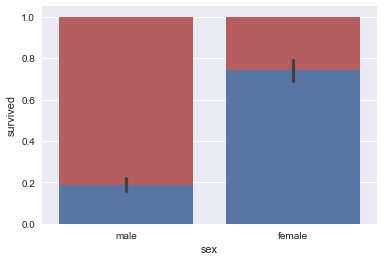

In [83]:
data['total'] = 1
fig,ax = plt.subplots()
sns.barplot(x='sex', y='total', data=data, color='r', ax=ax)
sns.barplot(x='sex', y='survived', data=data, color='b', ax=ax)

- 幸存和遇难乘客的票价分布（分类箱式图）

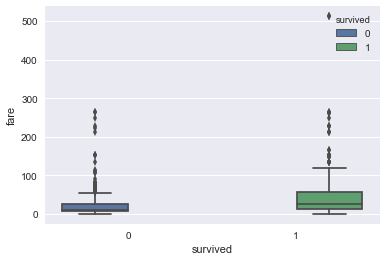

In [85]:
sns.boxplot(x='survived', y='fare', data=data, hue='survived')

- 幸存和遇难乘客的年龄分布（分类箱式图）

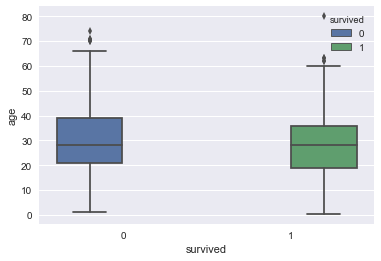

In [86]:
sns.boxplot(x='survived', y='age', data=data, hue='survived')

- 不同上船港口的乘客仓位等级分布（分组柱状图）

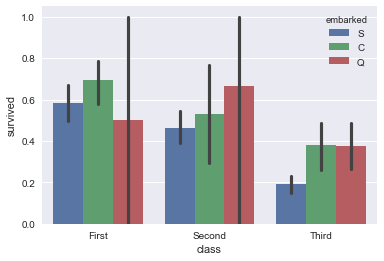

In [88]:
sns.barplot(x='class', y='survived', data=data, hue='embarked')

- 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

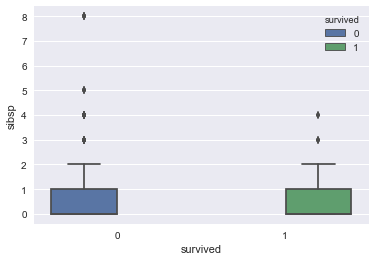

In [90]:
sns.boxplot(x='survived', y='sibsp', data=data, hue='survived')

- 幸存和遇难乘客父母子女的数量分布（分类箱式图）

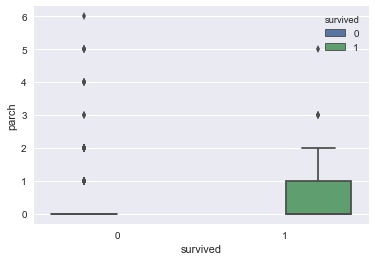

In [91]:
sns.boxplot(x='survived', y='parch', data=data, hue='survived')

- 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

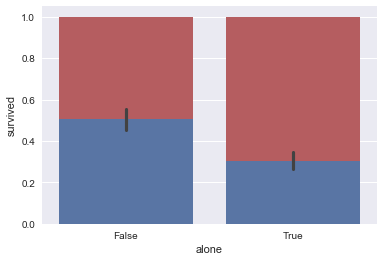

In [92]:
data['total'] = 1
fig,ax = plt.subplots()
sns.barplot(x='alone', y='total', data=data, color='r', ax=ax)
sns.barplot(x='alone', y='survived', data=data, color='b', ax=ax)

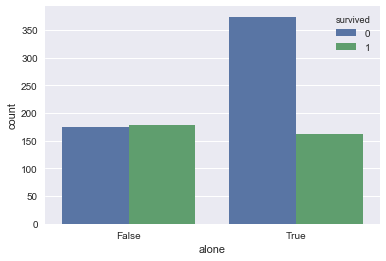

In [93]:
sns.countplot(x='alone',data=data, hue='survived')